 
  <h1><center><font size=10>Google Query</center></font></h1>
  <h1><center>Exploratory Data Analysis - Google Query Case Study</center></h1>

<p>This data analysis delves into Google search data by DMA. By examining this data, we aim to uncover insights into:
</p>
<ol>
    <li>
        <p>Searches for NBA team-related terms.</p>
    </li>
    <li>
        <p>The relationship between NBA teams' records (winning percentage) and searches for the teams.</p>
    </li>
    
</ol>

In [114]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import requests
from pathlib import Path

# Libraries to help with data visualization
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [115]:
# Study data files
google_query_top_search_path = "data/Google_BIQuery_Long_Lat.csv"

google_query_top_search_data = pd.read_csv(google_query_top_search_path)

# Read the CSV into a Pandas DataFrame
google_queryDF = pd.DataFrame(google_query_top_search_data)

# Display the data table for preview
google_queryDF.head()

,week,month,score,rank,refresh_date,dma_name,state,region,latitude,longitude,dma_id,term,category
0,1/7/24,January,NaN,1,5/15/24,Portland-Auburn ME,ME,Northeast,45.253783,-69.445469,500,Harrison Butker,Sports
1,1/7/24,January,NaN,1,5/15/24,Charlotte NC,NC,South,35.759573,-79.019300,517,Harrison Butker,Sports
2,1/7/24,January,NaN,1,5/15/24,Wilmington NC,NC,South,35.759573,-79.019300,550,Harrison Butker,Sports
3,1/7/24,January,NaN,1,5/15/24,Dothan AL,AL,South,32.318231,-86.902298,606,Harrison Butker,Sports
4,1/7/24,January,NaN,1,5/15/24,Baltimore MD,MD,Northeast,39.045755,-76.641271,512,Harrison Butker,Sports


In [116]:
# Print the last five rows of data to the screen
google_queryDF.tail()

,week,month,score,rank,refresh_date,dma_name,state,region,latitude,longitude,dma_id,term,category
115479,5/12/24,May,100.0,25,5/13/24,Youngstown OH,OH,Midwest,40.417287,-82.907123,536,Paul Skenes,Sports
115480,5/12/24,May,100.0,25,5/13/24,Monroe LA-El Dorado AR,AR,South,35.201050,-91.831833,628,Paul Skenes,Sports
115481,5/12/24,May,100.0,25,5/13/24,Austin TX,TX,South,31.968599,-99.901813,635,Paul Skenes,Sports
115482,5/12/24,May,100.0,25,5/13/24,Bluefield-Beckley-Oak Hill WV,WV,South,38.597626,-80.454903,559,Paul Skenes,Sports
115483,5/12/24,May,18.0,25,5/13/24,Abilene-Sweetwater TX,TX,South,31.968599,-99.901813,662,Paul Skenes,Sports


Text(0, 0.5, '# of Categories')

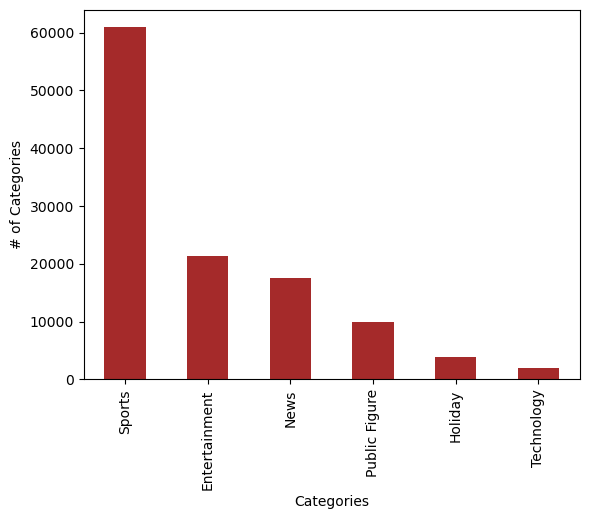

In [117]:
dma_counts_df = google_queryDF.groupby('category')

miceCount = google_queryDF["category"].value_counts()
plotsShow = miceCount.plot.bar(color='brown')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Categories")
plt.ylabel("# of Categories")

In [118]:
category_counts = google_queryDF['category'].value_counts()
total_category_entries = len(google_queryDF['category'])
regional_distribution = (category_counts / total_category_entries) * 100
result_df = pd.concat([category_counts, regional_distribution], axis=1)
result_df.columns = ['Counts', 'Percentage']
result_df

,Counts,Percentage
category,,
Sports,60898,52.732846
Entertainment,21292,18.437186
News,17469,15.126771
Public Figure,9905,8.576946
Holiday,3953,3.422985
Technology,1967,1.703266


In [119]:
regional_counts = google_queryDF['region'].value_counts()
total_regional_entries = len(google_queryDF['region'])
regional_distribution = (regional_counts / total_regional_entries) * 100
result_df = pd.concat([regional_counts, regional_distribution], axis=1)
result_df.columns = ['Counts', 'Percentage']
result_df

,Counts,Percentage
region,,
South,45988,39.821967
Midwest,31883,27.608154
West,23111,20.012296
Northeast,14502,12.557584


Text(0, 0.5, 'Percentage')

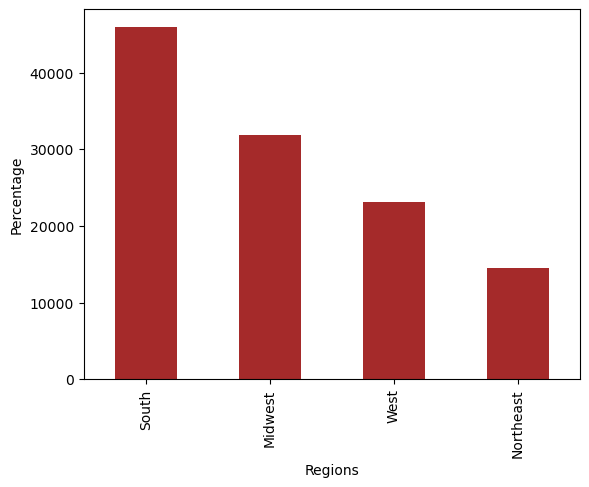

In [120]:
dma_counts_df = google_queryDF.groupby('region')

miceCount = google_queryDF["region"].value_counts()
plotsShow = miceCount.plot.bar(color='brown')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Regions")
plt.ylabel("Percentage")


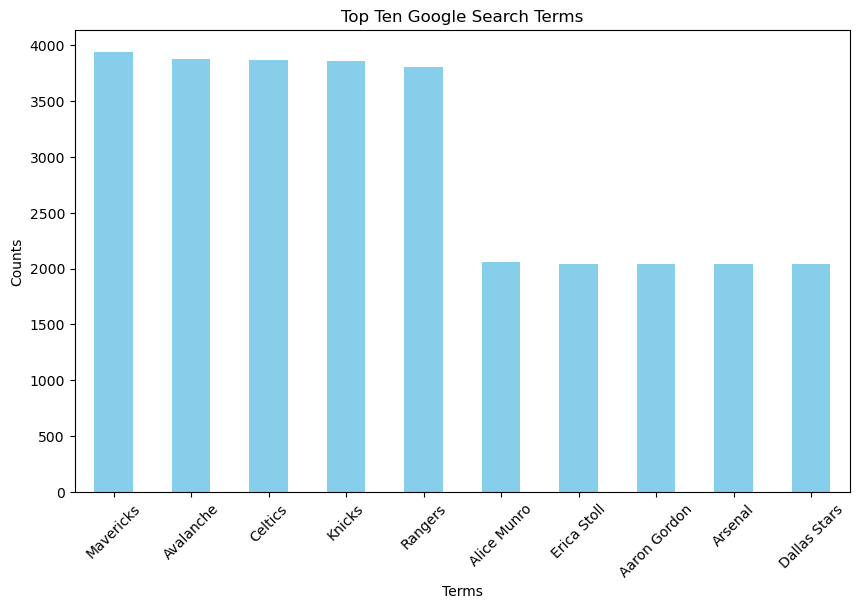

In [121]:
category_counts = google_queryDF['term'].value_counts()
total_entries = len(google_queryDF['term'])

# Calculate percentage for each category
category_percentage = (category_counts / total_entries) * 100

# Concatenate counts and percentages into a DataFrame
result_df = pd.concat([category_counts, category_percentage], axis=1)
result_df.columns = ['Counts', 'Percentage']

# Sort the DataFrame by counts in descending order
result_df = result_df.sort_values(by='Counts', ascending=False)
top_ten = result_df.head(10)

plt.figure(figsize=(10, 6))
top_ten['Counts'].plot(kind='bar', color='skyblue')
plt.title('Top Ten Google Search Terms')
plt.xlabel('Terms')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

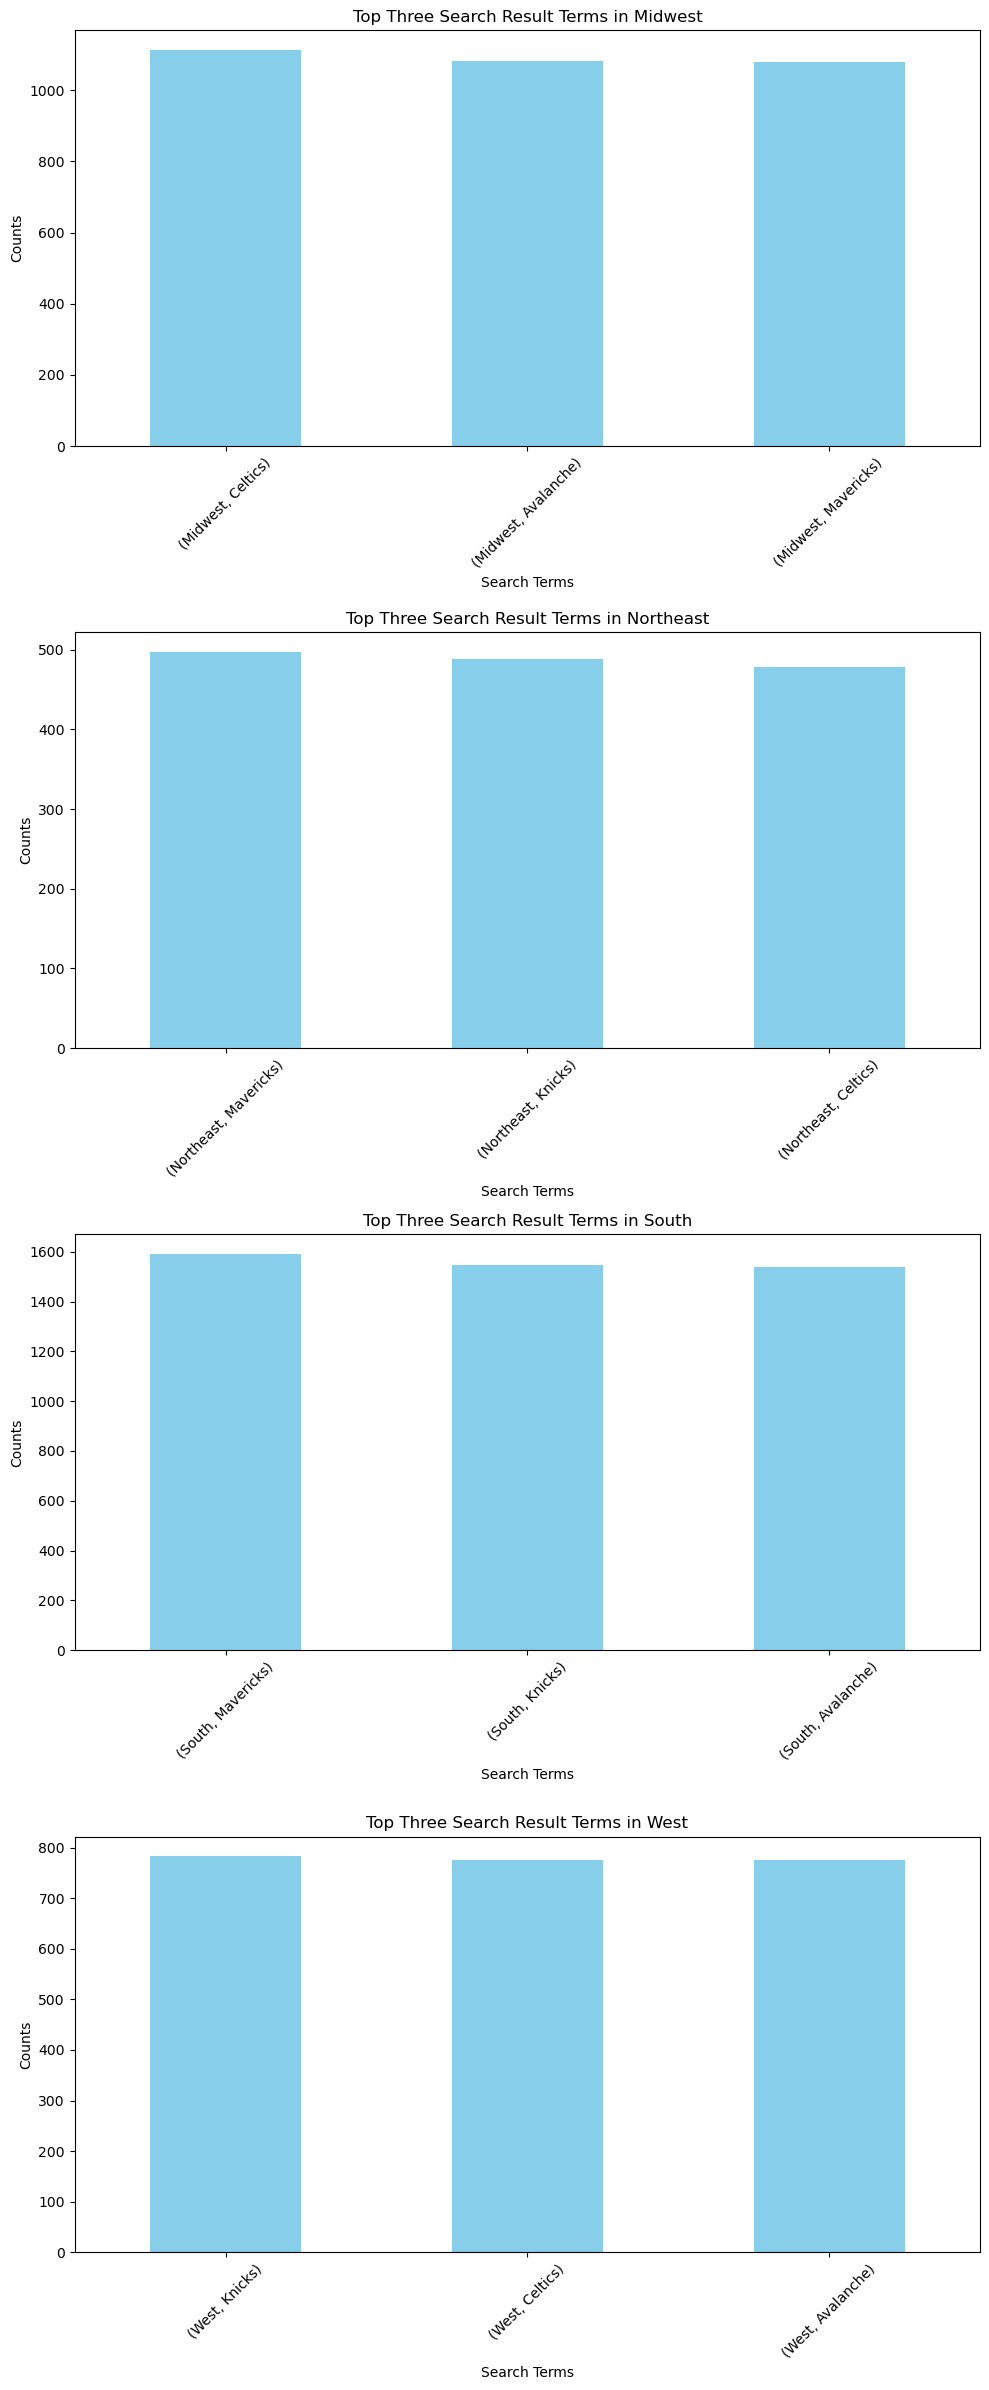

In [122]:
top_terms_by_region = google_queryDF.groupby('region')['term'].value_counts().groupby(level=0).head(3)

# Plotting
fig, axes = plt.subplots(nrows=len(top_terms_by_region.index.levels[0]), ncols=1, figsize=(10, 6 * len(top_terms_by_region.index.levels[0])))

for i, (region, data) in enumerate(top_terms_by_region.groupby(level=0)):
    ax = data.plot(kind='bar', ax=axes[i], color='skyblue')
    ax.set_title(f'Top Three Search Result Terms in {region}')
    ax.set_xlabel('Search Terms')
    ax.set_ylabel('Counts')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


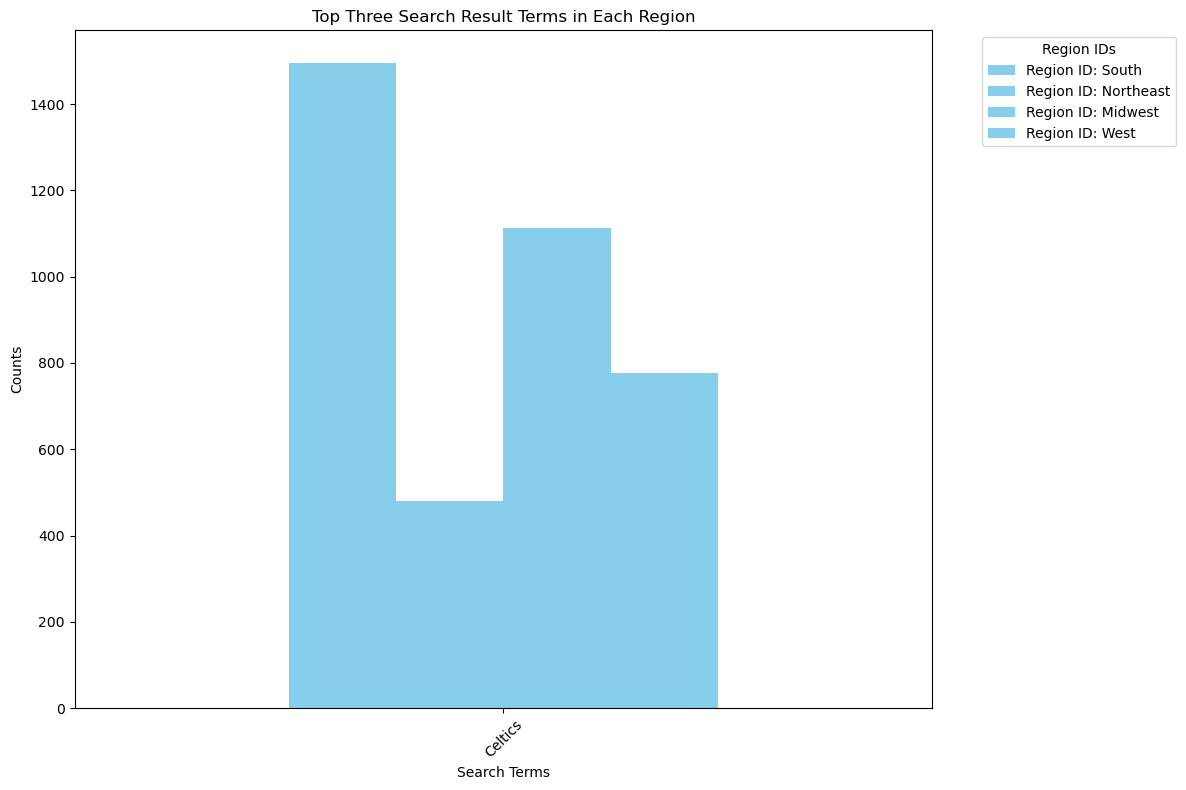

In [123]:
copied_df = google_queryDF.copy()
top_terms_by_region = copied_df.loc[copied_df["term"] == "Celtics",:]
top_terms_by_region
unique_regions = top_terms_by_region['region'].unique()[:10]  # Limiting to top 10 regions
unique_regions

combined_data = pd.DataFrame()

for region_id in unique_regions:
    region_data = top_terms_by_region[top_terms_by_region['region'] == region_id]['term'].value_counts().head(3)
    combined_data[f'Region ID: {region_id}'] = region_data

# Plotting combined data
fig, ax = plt.subplots(figsize=(12, 8))
combined_data.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Top Three Search Result Terms in Each Region')
ax.set_xlabel('Search Terms')
ax.set_ylabel('Counts')
ax.tick_params(axis='x', rotation=45)
plt.legend(title='Region IDs', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


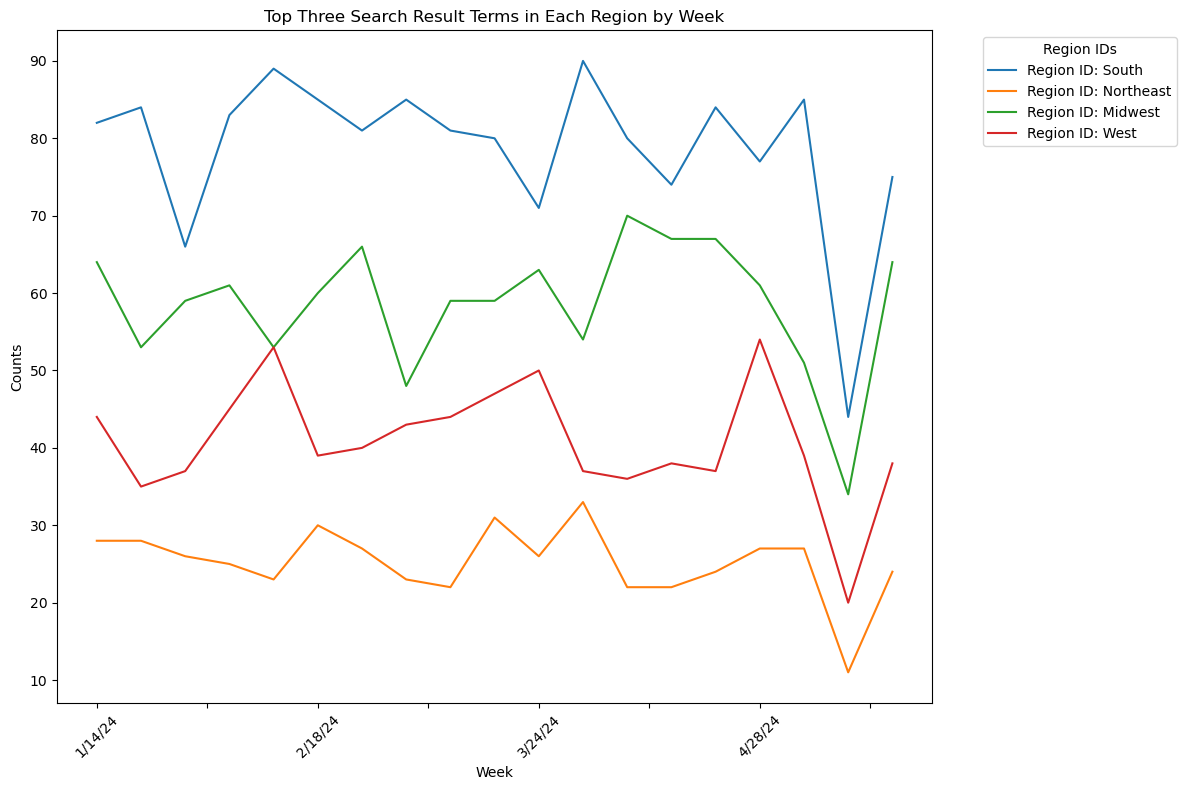

In [124]:
copied_df_2 = google_queryDF.copy()
top_terms_by_region = copied_df_2.loc[copied_df_2["term"] == "Celtics",:]
top_terms_by_region
unique_regions = top_terms_by_region['region'].unique()[:10]  # Limiting to top 10 regions
unique_regions


# Create an empty DataFrame to store combined data
combined_data = pd.DataFrame()

for region_id in unique_regions:
    # Group by both 'region' and 'week' and count occurrences of 'term'
    region_data = top_terms_by_region[top_terms_by_region['region'] == region_id].groupby(['week', 'term']).size().unstack().fillna(0)
    # Take the top three search result terms for each week
    region_data = region_data.apply(lambda x: x.nlargest(3).sum(), axis=1)
    combined_data[f'Region ID: {region_id}'] = region_data

# Plotting combined data
fig, ax = plt.subplots(figsize=(12, 8))
combined_data.plot(kind='line', ax=ax)
ax.set_title('Top Three Search Result Terms in Each Region by Week')
ax.set_xlabel('Week')
ax.set_ylabel('Counts')
ax.tick_params(axis='x', rotation=45)
plt.legend(title='Region IDs', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


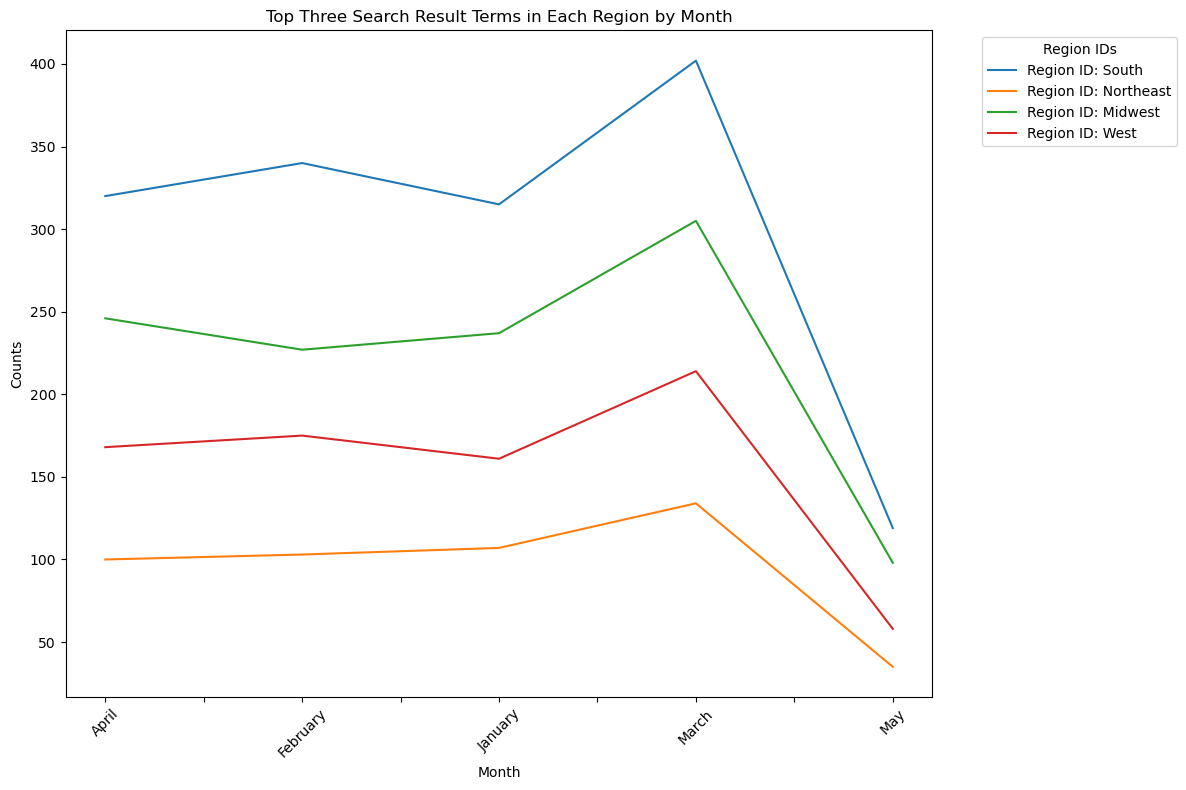

In [125]:
top_terms_by_region = google_queryDF[google_queryDF["term"].isin(["Celtics", "Nuggets","Thunder","Timberwolves","Clippers" ])]
unique_regions = top_terms_by_region['region'].unique()[:10]  # Limiting to top 10 regions

# Create an empty DataFrame to store combined data
combined_data = pd.DataFrame()

for region_id in unique_regions:
    # Group by both 'region' and 'month' and count occurrences of 'term'
    region_data = top_terms_by_region[top_terms_by_region['region'] == region_id].groupby(['month', 'term']).size().unstack().fillna(0)
    # Take the top three search result terms for each month
    region_data = region_data.apply(lambda x: x.nlargest(3).sum(), axis=1)
    combined_data[f'Region ID: {region_id}'] = region_data

# Plotting combined data
fig, ax = plt.subplots(figsize=(12, 8))
combined_data.plot(kind='line', ax=ax)
ax.set_title('Top Three Search Result Terms in Each Region by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Counts')
ax.tick_params(axis='x', rotation=45)
plt.legend(title='Region IDs', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

['Celtics']


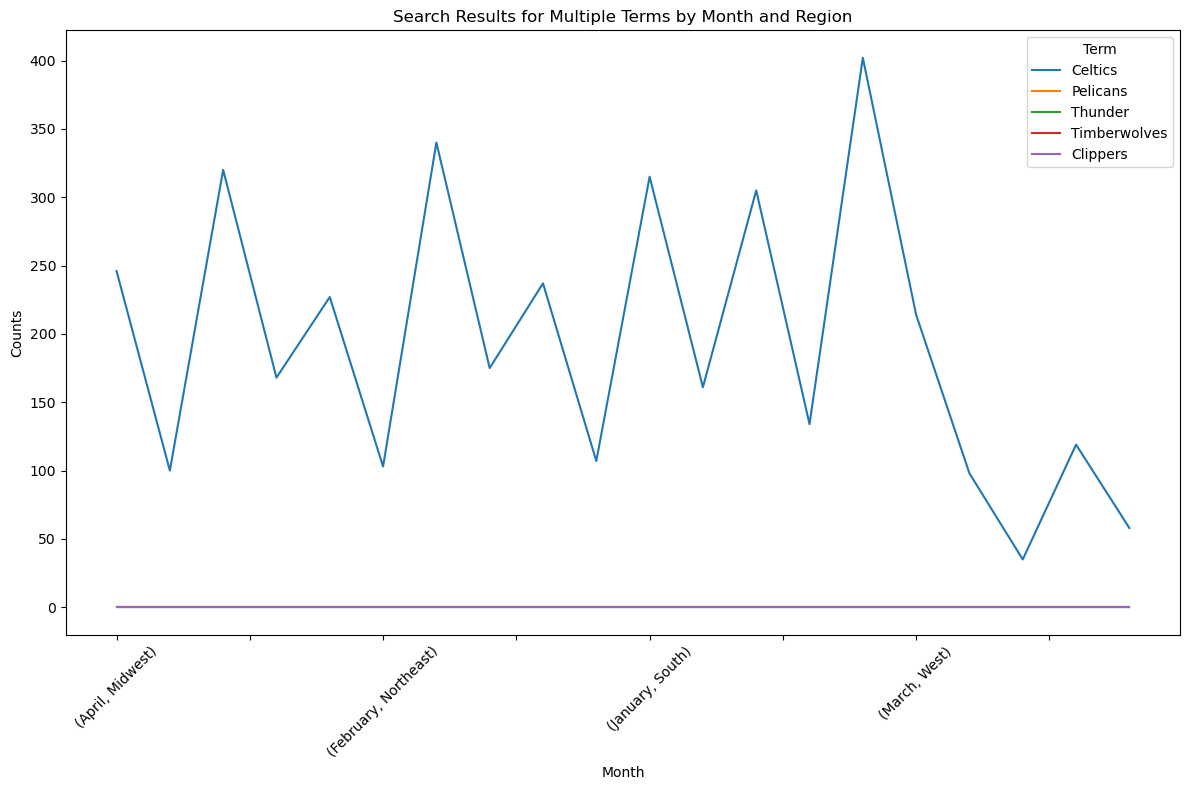

In [126]:
terms = ["Celtics", "Pelicans", "Thunder", "Timberwolves", "Clippers"]

# Filter google_queryDF to include only rows where the term is in the list of terms
top_terms_by_region = google_queryDF[google_queryDF["term"].isin(terms)]

print(top_terms_by_region['term'].unique())


# Plotting the data
fig, ax = plt.subplots(figsize=(12, 8))

# Group by 'month', 'region', and 'term', then count occurrences
grouped_data = top_terms_by_region.groupby(['month', 'region', 'term']).size().unstack(fill_value=0)

# Ensure all terms are included in the plot even if one of them has no data for a specific month or region
grouped_data = grouped_data.reindex(columns=terms, fill_value=0)

# Plot the grouped data
grouped_data.plot(kind='line', ax=ax)
ax.set_title('Search Results for Multiple Terms by Month and Region')
ax.set_xlabel('Month')
ax.set_ylabel('Counts')
ax.tick_params(axis='x', rotation=45)
plt.legend(title='Term')

plt.tight_layout()
plt.show()
